## import

In [53]:
import numpy as np
import pandas as pd 

In [54]:
erp = pd.read_csv('C:\\Users\\antoi\\OneDrive\\Bureau\\openclassrooms\\Projet 5\\erp.csv',sep=';')
web = pd.read_csv('C:\\Users\\antoi\\OneDrive\\Bureau\\openclassrooms\\Projet 5\\web.csv', sep =';')
liaison = pd.read_csv('C:\\Users\\antoi\\OneDrive\\Bureau\\openclassrooms\\Projet 5\\liaison.csv',sep=';')

## erp

In [55]:
print('ERP')
print(erp.nunique())

ERP
product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64


In [56]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock


In [57]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      825 non-null    int64 
 1   onsale_web      825 non-null    int64 
 2   price           825 non-null    object
 3   stock_quantity  825 non-null    int64 
 4   stock_status    825 non-null    object
dtypes: int64(3), object(2)
memory usage: 32.4+ KB


In [58]:
erp["price"] = erp["price"].str.replace(",",".").astype(float)

In [59]:
erp["product_id"].isnull().sum()

0

## liaison

In [60]:
print('Liaison')
liaison.nunique()

Liaison


product_id    825
id_web        734
dtype: int64

In [61]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [62]:
liaison = liaison.rename(columns={"id_web":"sku"})

In [63]:
liaison.shape

(825, 2)

In [64]:
print(liaison["product_id"].isnull().sum())
print(liaison["sku"].isnull().sum())

0
91


## web

In [65]:
print('Web')
web.nunique()

Web


sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64

In [66]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [67]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sku                    1428 non-null   object 
 1   virtual                1513 non-null   int64  
 2   downloadable           1513 non-null   int64  
 3   rating_count           1513 non-null   int64  
 4   average_rating         1430 non-null   float64
 5   total_sales            1430 non-null   float64
 6   tax_status             716 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            1430 non-null   float64
 9   post_date              1430 non-null   object 
 10  post_date_gmt          1430 non-null   object 
 11  post_content           0 non-null      float64
 12  post_title             1430 non-null   object 
 13  post_excerpt           716 non-null    object 
 14  post_status            1430 non-null   object 
 15  comm

In [68]:
web.value_counts()

Series([], dtype: int64)

In [69]:
web["sku"].isnull().sum()

85

# jointures

## test 1

In [70]:
#Test de jointure entre Erp et Liaison
Test_1 = pd.merge(erp, liaison, how="outer", on="product_id", indicator=True)
Test_1.shape

(825, 7)

In [71]:
Test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      825 non-null    int64   
 1   onsale_web      825 non-null    int64   
 2   price           825 non-null    float64 
 3   stock_quantity  825 non-null    int64   
 4   stock_status    825 non-null    object  
 5   sku             734 non-null    object  
 6   _merge          825 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 46.1+ KB


## test 2

In [72]:
#Test de jointure entre Erp, Liaison et Web
Test_2 = pd.merge(erp, liaison, how="outer", on="product_id")
Test_2 = pd.merge(Test_2, web, how="outer", on="sku", indicator=True) # nouvelle colonne pour savoir d'ou vient la ligne 
Test_2.shape

(9183, 34)

In [73]:
Test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9183 entries, 0 to 9182
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   product_id             9183 non-null   int64   
 1   onsale_web             9183 non-null   int64   
 2   price                  9183 non-null   float64 
 3   stock_quantity         9183 non-null   int64   
 4   stock_status           9183 non-null   object  
 5   sku                    1448 non-null   object  
 6   virtual                9163 non-null   float64 
 7   downloadable           9163 non-null   float64 
 8   rating_count           9163 non-null   float64 
 9   average_rating         1610 non-null   float64 
 10  total_sales            1610 non-null   float64 
 11  tax_status             896 non-null    object  
 12  tax_class              0 non-null      float64 
 13  post_author            1610 non-null   float64 
 14  post_date              1610 non-null   o

In [74]:
Test_2.nunique()

product_id                825
onsale_web                  2
price                     381
stock_quantity            128
stock_status                2
sku                       734
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
_merge    

In [75]:
#isolmeent des valeurs nul de sku dans web
Web_id_null = web[web['sku'].isnull()]
Web_id_null

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
#data temporaire pour web et liaison pour faire les manipulations
webt = web
liaisont = liaison

#drop les sku avec valeurs null dans web et liaison voir les études de fichier au dessus
webt = webt.dropna(subset=["sku"])
liaisont = liaisont.dropna(subset=["sku"])

#Affiche les lignes qui n'ont pas de correspondance entre Erp, Liaison et Web
Test_2.loc[Test_2["_merge"]=="left_only"]

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
8105,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8188,4568,0,21.5,0,outofstock,15065,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8193,4584,0,32.3,0,outofstock,14785,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8400,4741,0,12.4,0,outofstock,12601,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8467,4864,0,8.3,0,outofstock,15154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8472,4869,0,17.2,0,outofstock,14360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8527,4921,0,13.8,0,outofstock,15608,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8528,4922,0,21.5,0,outofstock,15586,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8613,5018,0,15.4,0,outofstock,15272,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
8616,5021,0,17.1,0,outofstock,15630,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


## test 3

In [79]:
#Drop les doublons dans la table temporaire avant la jointure, toutes les lignes sont doublé une fois avec attachment et product, on garde que les product
attachment = webt.loc[webt["post_type"] == "attachment"]
webt = webt.drop(webt[webt.post_type == "attachment"].index)

#Jointure de test
Test_3 = pd.merge(erp, liaisont, on= "product_id", indicator=True)

#Jointure de test
Test_all =pd.merge(Test_3, webt, on="sku", indicator=True)

ValueError: Cannot use name of an existing column for indicator column

In [78]:
#Affiche les résultats des test de jointures
print("test 3")
print(Test_3["_merge"].value_counts())
print()
print("test 4")
print(Test_all["_merge"].value_counts())

test 3
both          734
left_only       0
right_only      0
Name: _merge, dtype: int64

test 4


NameError: name 'Test_all' is not defined

## jointure final

In [80]:
#laison erp et liaisont
All = pd.merge(erp, liaisont, on= "product_id")

#liaison all et webt
All = pd.merge(All, webt, on="sku")

## création colonne ca

In [81]:
#Ajoute la colonne CA correspondant au Chiffre d'Affaire par produit
All["CA"]=All["total_sales"]*All["price"]
All.head()
#graphe nom produit et ca 

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,CA
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,145.2
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,42.3
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0


In [82]:
#Calcule le chiffre d'affaire total
Total_CA = All["CA"].sum()
Total_CA

70568.6

Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de
saisie dans certains prix des produits. J'aimerais que tu effectues une analyse
sur cette variable afin de détecter d’éventuelles valeurs aberrantes, de les lister
et d’en faire une représentation graphique pour plus de lisibilité.

In [83]:
calcul quartile, Q1 Q3 

SyntaxError: invalid syntax (3027696103.py, line 1)

In [85]:
# Calcul des quartiles
q1 = All['price'].quantile(0.25)
q3 = All['price'].quantile(0.75)
print(q1)
print(q3)


14.1
42.175000000000004


In [87]:

# Calcul de l'IQR
iqr = q3 - q1
print(iqr)

28.075000000000003


In [89]:
# Définition des bornes supérieure et inférieure pour les outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)

-28.012500000000003
84.28750000000001


In [93]:
# Identification des outliers
outliers = All[(All['price'] < lower_bound) | (All['price'] > upper_bound)]

In [95]:
outliers.columns

Index(['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status',
       'sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count', 'CA'],
      dtype='object')

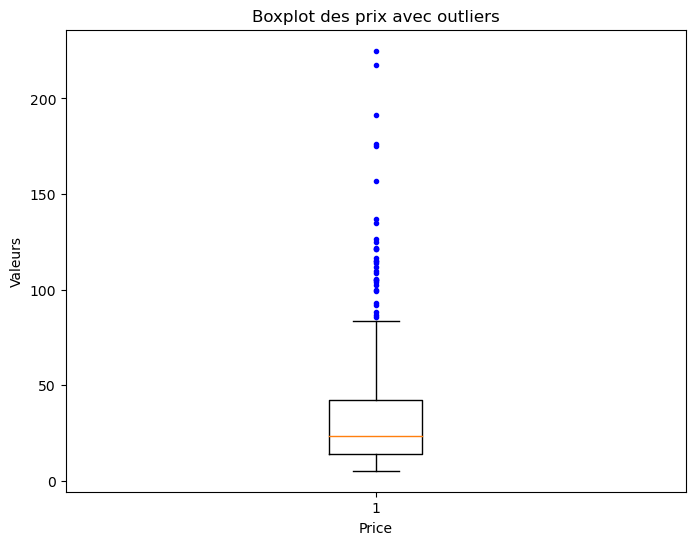

In [96]:
import matplotlib.pyplot as plt

# Création du boxplot avec outliers
plt.figure(figsize=(8, 6))
plt.boxplot(All['price'], whis=1.5, sym='b.')
plt.title("Boxplot des prix avec outliers")
plt.xlabel("Price")
plt.ylabel("Valeurs")
plt.show()
